## Метод K-Nearest Neighbors. Разбор без использования бибилотек и с использованием бибилиотек.

Начнем разбор алгоритмов машинного обучения с наиболее прозрачной для понимания задачи классификации. Чтобы понять, что это за задача и для чего она вообще решается, давайте вспомним о весьма перспективной разработке - беспилотных автомобилях. Понятно, что сама по себе машина не понимает, что такое проезжая часть, и не может отличить человека от светофора - для этого ее надо научить различать знаки, людей, животных и т.д. Здесь, помимо достаточно сложных отраслей машинного обучения, таких как машинное зрение и системы принятия решений, используется классификация: автомобиль "учится" различать препятствия, которые необходимо объехать; людей, чтобы пропустить их при переходе дороги; знаки, чтобы точно следовать правилам. Говоря простым языком, система относит объекты к тому или иному классу, чтобы правильно себя вести при встрече с ними, то есть классификация в машинном обучении - не что иное, как задача отнесения объекта к одному из заранее определенных классов на основании его признаков.

Начнем с kNN - одного из наиболее распространенных методов классификации в ML. Его достаточно просто реализовать в отличие от других алгоритмов, поэтому для наглядности того, как в целом работает классификация, мы сначала напишем собственную реализацию и посмотрим на результаты, применив метод к стандартному датасету Iris, а затем сравним с библиотечной реализацией из библиотеки sklearn. Следующие алгоритмы мы не будем разбирать настолько досконально из-за трудоемкой реализации - рассмотрим общую методологию и разберем, на основе чего алгоритм принял решение в пользу того или иного класса.

Метод kNN относится к разряду ленивых классификаторов. В целом это указывает на то, что метод "обучается" лишь на новых данных, не учитывая предыдущий опыт. В данном же случае это означает, что в процессе обучения алгоритм не делает ничего, а только сохраняет размеченные тренировочные данные. Сам процесс классификации начинается только тогда, когда появляются новые немаркированные данные - алгоритм по каким-то признакам считает расстояния между уже размеченными и еще неизвестными объектами в пространстве. Очевидно, что, если мы будем рассчитывать расстояния между известными данными и каждым новым набором неразмеченных данных, то каждый раз будем получать различные расстояния между объектами, поэтому изначально "обучать" алгоритм на одних расстояниях, чтобы он запомнил, на какой позиции к какому классу относится объект, совершенно не имеет смысла - позиций может быть бесконечное множество, поэтому хранить их все в памяти не получится.

Еще один важный момент: как понять, насколько точно модель строит прогнозы? В данном случае одним из простейших способов определить ошибку является просто вычисление отношения числа верных предсказаний к общему количеству сделанных предсказаний. Эту метрику называют долей правильных ответов. Очевидно, ее значения будут находиться в пределах от 0 до 1, где 0 - совершенно бесполезная модель, а 1 - абсолютно точная.

Алгоритм kNN состоит из трех последовательных этапов:

вычислить расстояние от целевого объекта (который необходимо классифицировать) до каждого из объектов обучающей выборки (уже маркированных каким-либо классом);

отобрать  k  объектов обучающей выборки, расстояния до которых минимальны (на первом этапе  k  выбирается произвольно, затем итеративно подбирается лучшее значение  k  на основе точности полученных прогнозов при каждом из выбранных  k );

получить класс объекта на основе наиболее часто встречающегося среди  k  ближайших соседей (это может быть число или название класса в зависимости от того, как изначально были обозначены классы - например, в примере с беспилотниками это может быть "человек" или "бетонный блок").

Здесь стоит отметить, что количество классов модель выясняет сама уже в процессе классификации: информация о классе содержится в самих объектах размеченных данных (во всех соседях), поэтому просто посчитать количество экземпляров одного и того же класса для алгоритма не составляет труда.

Давайте разберем на примере как работает этот агоритм. Посторим сами алгоритм без использования библиотек и с использованием библиотек на примере дата сете с даттыми о цветах ирисах.
Импорт набора данных Iris. Он представляет собой собрание морфологических измерений нескольких сортов ирисов и для каждого растения имеет 4 характеристики:

длина чашелистика
ширина чашелистика
длина лепестка
ширина лепестка

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris() # возвращает объект с несколькими полями

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to rev

In [3]:
iris_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
iris_dataset['target_names'] # виды ирисов

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris_dataset['feature_names'] # характеристики каждого цветка

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
print(iris_dataset['target'].shape) # каждый цветок соответствует виду
iris_dataset['target'] # 0 - setosa, 1 - versicolor, 2 - virginica

(150,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
print(type(iris_dataset['data'])) 
iris_dataset['data'].shape # всего 150 цветков, у каждого 4 измерения

<class 'numpy.ndarray'>


(150, 4)

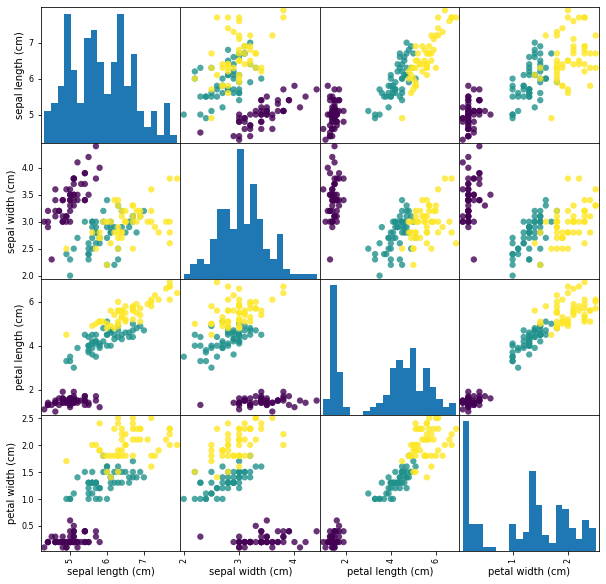

In [9]:
import pandas as pd

iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

из графиков мы можем заметить, что данные классов, по-видимому, хорошо сепарируются (от separate - разделять) по измерениям лепестков и чашелистиков, поэтому, скорее всего, модель машинного обучения сможет научиться неплохо их разделять.

Но при четырех параметрах достаточно сложно представить, как расположены объекты относительно друг друга, так как придется работать в четырехмерном пространстве. По графикам видно, что лучше всего цветки разбиваются по измерениям длины и ширины лепестка (petal length, petal width), поэтому для наглядности оставим только эти данные.

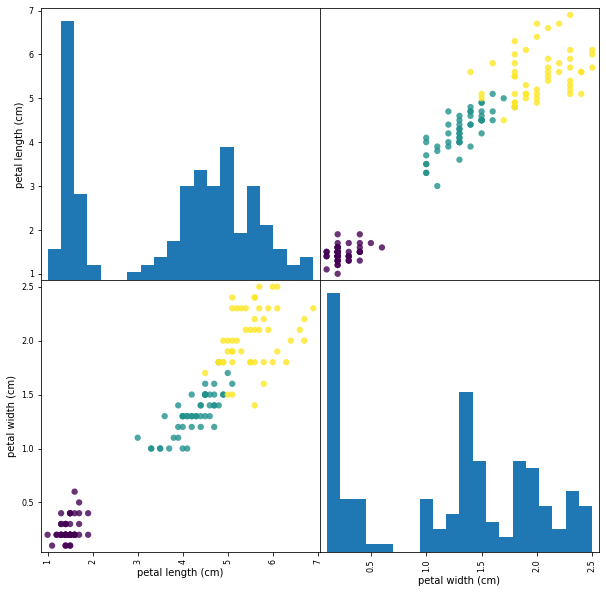

In [10]:
iris_dataframe_simple = pd.DataFrame(iris_dataset.data[:, 2:4], columns=iris_dataset.feature_names[2:4])
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe_simple, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

Разобьем данные на тренировочный и тестовый датасеты и для простоты реализации алгоритма объединим массивы признаков объектов и метки их классов, чтобы было понятно, к какому классу относится каждый объект.

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data[:, 2:4], 
                                                    iris_dataset['target'],
                                                    random_state=0) # random_state - для воспроизводимости

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (112, 2), y_train shape: (112,),
X_test shape: (38, 2), y_test shape: (38,)


In [12]:
import numpy as np

x_train_concat = np.concatenate((x_train, y_train.reshape(112, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(38, 1)), axis=1)
print(f'X_train shape: {x_train_concat.shape},\n'
      f'X_test shape: {x_test_concat.shape}')

X_train shape: (112, 3),
X_test shape: (38, 3)


Как мы видим, теперь в последнем столбце у нас присутствуют метки класса.

Приступим к реализации алгоритма.

Для начала определим метрику, по которой будем определять расстояние между объектами. Обозначим через $x = (x_1, x_2, \ldots, x_n)$ координаты объекта $x$ в n-мерном пространстве, а через $y = (y_1, y_2, \ldots, y_n)$ - координаты объекта $y$. 

По умолчанию алгоритм использует метрику Минковского, которая в случае степени p = 2 обращается во всем известную из школьной геометрии Евклидову метрику - расстояние между двумя точками в пространстве:
$$
dist = \sqrt{(x_1-y_1)^2 + (x_2 - y_2)^2 + \ldots + (x_n - y_n)^2}
$$
Ее и будем использовать.

In [13]:
import math

def euclidean_distance(data1, data2):
    distance = 0
    for i in range (len(data1) - 1):
        distance += (data1[i] - data2[i]) ** 2
    return math.sqrt(distance)

Вычислим расстояния до всех точек обучающей выборки и отберем  k  соседей (то есть тех, расстояния до которых минимальны).



In [14]:
def get_neighbors(train, test, k=1):
    distances = [(train[i][-1], euclidean_distance(train[i], test))
                  for i in range (len(train))]
    distances.sort(key=lambda elem: elem[1])
    
    neighbors = [distances[i][0] for i in range (k)]
    return neighbors

Теперь получим прогноз на основе классов соседей. Посчитаем, сколько объектов каждого класса присутствует среди  k  ближайших к целевому, и затем причислим его к тому классу, экземпляров которого больше всего.



In [15]:
def prediction(neighbors):
    count = {}
    for instance in neighbors:
        if instance in count:
            count[instance] +=1
        else :
            count[instance] = 1
    target = max(count.items(), key=lambda x: x[1])[0]
    return target

Напишем последнюю функцию для оценки точности прогнозов. О ней речь шла в самом начале - это просто отношение верных прогнозов к общему количеству прогнозов.

In [16]:
def accuracy(test, test_prediction):
    correct = 0
    for i in range (len(test)):
        if test[i][-1] == test_prediction[i]:
            correct += 1
    return (correct / len(test))

Посмотрим, как работает наш алгоритм.

In [18]:
predictions = []
for x in range (len(x_test_concat)):
    neighbors = get_neighbors(x_train_concat, x_test_concat[x], k=5)
    result = prediction(neighbors)
    predictions.append(result)
#     print(f'predicted = {result}, actual = {x_test_concat[x][-1]}') # если есть интерес посмотреть, какие конкретно прогнозы некорректны
accuracy = accuracy(x_test_concat, predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9736842105263158


Теперь импортируем библиотечную версию алгоритма.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html

Объект knn инкапсулирует алгоритм, который будет использоваться для построения модели из обучающих данных, а также для прогнозирования новых точек данных. Он также будет содержать информацию, которую алгоритм извлек из обучающих данных. В случае KNeighborsClassifier он будет просто хранить учебный набор.

Для построения модели на обучающем множестве вызывается метод fit объекта knn, который принимает в качестве аргументов массив NumPy x_train, содержащий обучающие данные, и массив NumPy y_train соответствующих обучающих меток.

In [20]:
knn_model = knn.fit(x_train, y_train)

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


Для предсказаний вызывается метод predict, который в качестве аргументов принимает тестовые данные.

In [21]:
knn_predictions = knn.predict(x_test)
knn_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

Для проверки импортируем простую встроенную метрику accuracy_score, которая определяет долю правильных ответов.

In [22]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9736842105263158


Как мы видим, реализованный вручную алгоритм при данных параметрах по точности сопоставим с библиотечной моделью, однако на практике стоит пользоваться именно готовыми реализациями, так как зачастую они гораздо лучше оптимизированы и быстрее/лучше работают с большими выборками данных.

В целом, несмотря на то, что алгоритм достаточно прост для понимания и реализации, он нашел широкое применение в таких областях как рекомендательные системы, семантический поиск и обнаружение аномалий. Однако для его применения мы должны быть в состоянии сохранить весь обучающий набор в памяти, а выполнение классификаций может быть вычислительно дорогостоящим, поскольку алгоритм анализирует все точки данных для каждой классификации. По этим причинам kNN лучше всего применять к небольшим наборам данных, которые не имеют огромного набора признаков.

Мы разобрали построение модели kNN на датасете Iris, использвав только два самых кореллируемых принака. 

Однако другие признаки тоже могли быть важны для получения моделью более детальной информации об объектах и, соответственно, построения более точных прогнозов. Давайте построим такие модели.

Поочередно добавим к признакам (petal length, petal width) из урока  оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

*Примечание: признаки могут быть расположены в любом порядке.*

In [1]:
from sklearn.datasets import load_iris

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


Напомним порядок расположения признаков в массиве данных

In [37]:
iris_dataset = load_iris()
iris_dataset['feature_names']

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Для формирования массива новых признаков можно выбрать столбцы по условию илипросто удалить один из ненужных нам столбцов с помощью функции библиотеки *numpy.delete*

**Пример**

In [3]:
import numpy as np

In [ ]:
a = np.array([[ 0,  1,  2,  3],
               [ 4,  5,  6,  7],
               [ 8,  9, 10, 11],
               [12, 13, 14, 15]])

a_new = np.delete(a, 0, axis=1)
a_new

array([[ 1,  2,  3],
       [ 5,  6,  7],
       [ 9, 10, 11],
       [13, 14, 15]])

In [13]:
iris_dataset.keys() # что содержит датасет

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
iris_dataset['target_names'] # виды ирисов

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris_dataset['feature_names'] # характеристики каждого цветка

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
import pandas as pd

In [18]:
iris_dataset = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
iris_dataset.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


Поочередно добавим к признакам (petal length, petal width) оставшиеся признаки, чтобы получилось: 1) (sepal length, petal length, petal width); 2) (sepal width, petal length, petal width).

In [19]:
iris_dataset_1 = iris_dataset[['sepal length (cm)','petal length (cm)', 'petal width (cm)']]
iris_dataset_2 = iris_dataset[['sepal width (cm)','petal length (cm)', 'petal width (cm)']]

In [20]:
iris_dataset_1.head(2)

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2


In [21]:
iris_dataset_2.head(2)

,sepal width (cm),petal length (cm),petal width (cm)
0,3.5,1.4,0.2
1,3.0,1.4,0.2


Теперь посмотрим на трехмерном графике, насколько хорошо данные разделяются по каждой из совокупностей трех параметров.

In [27]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


**Пример** построения трехмерного графика

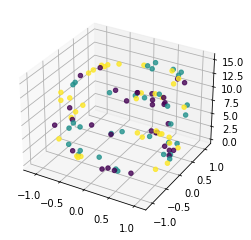

In [28]:
ax = plt.axes(projection='3d')

zdata = 15 * np.random.random(100) # точки оси Z
xdata = np.sin(zdata) + 0.1 * np.random.randn(100) # точки оси X
ydata = np.cos(zdata) + 0.1 * np.random.randn(100) # точки оси Y
colors = np.random.randint(3, size=100)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

**Примечание: для установки цвета в функции используем *c=iris_dataset.target*.**

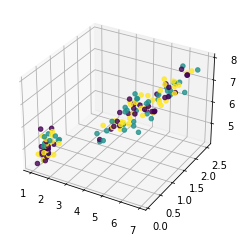

In [30]:
ax = plt.axes(projection='3d')


zdata = iris_dataset_1['sepal length (cm)'] # точки оси Z
xdata = iris_dataset_1['petal length (cm)'] # точки оси X
ydata = iris_dataset_1['petal width (cm)']
colors = np.random.randint(3, size=150)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

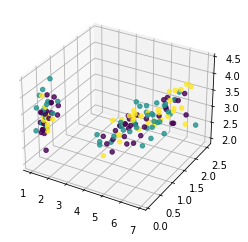

In [32]:
ax = plt.axes(projection='3d')

zdata = iris_dataset_2['sepal width (cm)'] # точки оси Z
xdata = iris_dataset_2['petal length (cm)'] # точки оси X
ydata = iris_dataset_2['petal width (cm)']
colors = np.random.randint(3, size=150)

ax.scatter3D(xdata, ydata, zdata, alpha=.8, c=colors)

С помощью функции sklearn.model_selection.train_test_split разделим данные на тренировочный и тестовый датасеты и затем, применив библиотечную версию алгоритма sklearn.neighbors.KNeighborsClassifier, постройте модель для наборов данных *iris_dataset_1* и *iris_dataset_2* (по умолчанию используйте n_neighbors=5).

*Примечание: в функции train_test_split используйте параметр random_state=17 для воспроизводимости результатов.*

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html

In [40]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset['target'], test_size = 0.2, random_state=0)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset['target'], test_size = 0.2, random_state=0)

In [42]:
print(x_train_1.shape)
print(y_train_1.shape)
print(x_test_1.shape)
print(y_test_1.shape)

(120, 3)
(120,)
(30, 3)
(30,)


In [43]:
knn = KNeighborsClassifier(n_neighbors=5)

In [44]:
knn_model_1 = knn.fit(x_train_1, y_train_1)

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [45]:
knn_model_2 = knn.fit(x_train_2, y_train_2)

C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neighbors\base.py:908: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


In [50]:
knn_predictions_1 = knn_model_1.predict(x_test_1)
print(knn_predictions_1)
print(y_test_1)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 0 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


In [51]:
knn_predictions_2 = knn_model_2.predict(x_test_2)
print(knn_predictions_2)
print(y_test_2)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


### 4.
Проверим точность работы обеих моделей, используя встроенную функцию sklearn.metrics.accuracy_score. Сравните результат их работы с результатом, полученным на наборе данных с двумя признаками (который разбирался в уроке), и укажите ответ.

In [52]:
from sklearn.metrics import accuracy_score

In [53]:
accuracy_1 = accuracy_score(y_test_1, knn_predictions_1)
accuracy_2 = accuracy_score(y_test_2, knn_predictions_2)

print(f'Accuracy_1: {accuracy_1}, accuracy_2: {accuracy_2}')

Accuracy_1: 0.9666666666666667, accuracy_2: 1.0


Построим модель на данных *x_train_1, y_train_1* с гиперпараметром n_neighbors, пробегающим значения от 1 до 20 включительно, и укажите значения n_neighbors, которым соответствует наиболее высокий результат функции accuracy_score().

*Примечание: можно воспользоваться циклом for, чтобы не прописывать вручную все 20 вариаций модели.*

In [58]:
iris_dataset = load_iris()

iris_dataset_for_split = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)

iris_dataset_1 = iris_dataset_for_split[['sepal length (cm)','petal length (cm)', 'petal width (cm)']]

iris_dataset_2 = iris_dataset_for_split[['sepal width (cm)','petal length (cm)', 'petal width (cm)']]

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(iris_dataset_1, iris_dataset['target'], test_size = 0.2, random_state=0)
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(iris_dataset_2, iris_dataset['target'], test_size = 0.2, random_state=0)

for i in range(21):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn_model_1 = knn.fit(x_train_1, y_train_1)
    knn_predictions_1 = knn_model_1.predict(x_test_1)
    accuracy_1 = accuracy_score(y_test_1, knn_predictions_1)
    print(f'Accuracy_1: {accuracy_1}, step/iter : {i}')

Accuracy_1: 1.0, step/iter : 0
Accuracy_1: 1.0, step/iter : 1
Accuracy_1: 1.0, step/iter : 2
Accuracy_1: 1.0, step/iter : 3
Accuracy_1: 1.0, step/iter : 4
Accuracy_1: 1.0, step/iter : 5
Accuracy_1: 1.0, step/iter : 6
Accuracy_1: 0.9666666666666667, step/iter : 7
Accuracy_1: 0.9666666666666667, step/iter : 8
Accuracy_1: 0.9666666666666667, step/iter : 9
Accuracy_1: 1.0, step/iter : 10
Accuracy_1: 0.9666666666666667, step/iter : 11
Accuracy_1: 1.0, step/iter : 12
Accuracy_1: 0.9666666666666667, step/iter : 13
Accuracy_1: 1.0, step/iter : 14
Accuracy_1: 1.0, step/iter : 15
Accuracy_1: 1.0, step/iter : 16
Accuracy_1: 1.0, step/iter : 17
Accuracy_1: 1.0, step/iter : 18
Accuracy_1: 1.0, step/iter : 19
Accuracy_1: 1.0, step/iter : 20


C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
C:\Users\pc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\datasets\base.py:245: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision

Как мы видим точность на тестовой выборке 1 везде кроме 7,8,9,11 и 13 ближайших соседей.